## The Sparks Foundation >>>>>> Task1 <<<<<<

## By Satish Kumar Pal Prediction using Supervised ML

## Data Preprocessing

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



## Load Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Satish Kumar Pal\\Desktop\\project playground\\The sparks Foundation\\Tassk 1\\scorce.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df.shape

(25, 2)

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Exploratory Data Analysis

In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


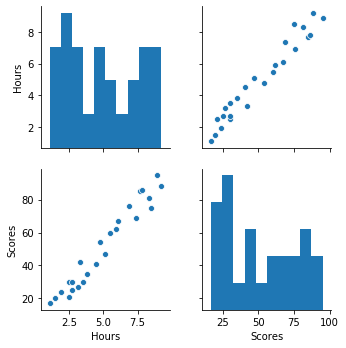

In [11]:
sns.pairplot(df)

In [12]:
# Value count of each Features
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("------------------------------")

In [13]:
value_count(df)

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64
------------------------------
30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64
------------------------------


## Correlation Matrix and Heatmap

In [14]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


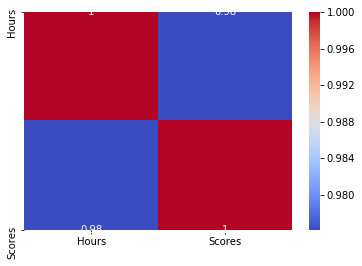

In [15]:
num_vars = ["Hours","Scores"]
sns.heatmap(df[num_vars].corr(), cmap = "coolwarm", annot = True)

## Preare Data For Machine Learnig Model

## Data Cleaning

In [16]:
# find the homuch missing data available
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
df.isnull().mean()*100

Hours     0.0
Scores    0.0
dtype: float64

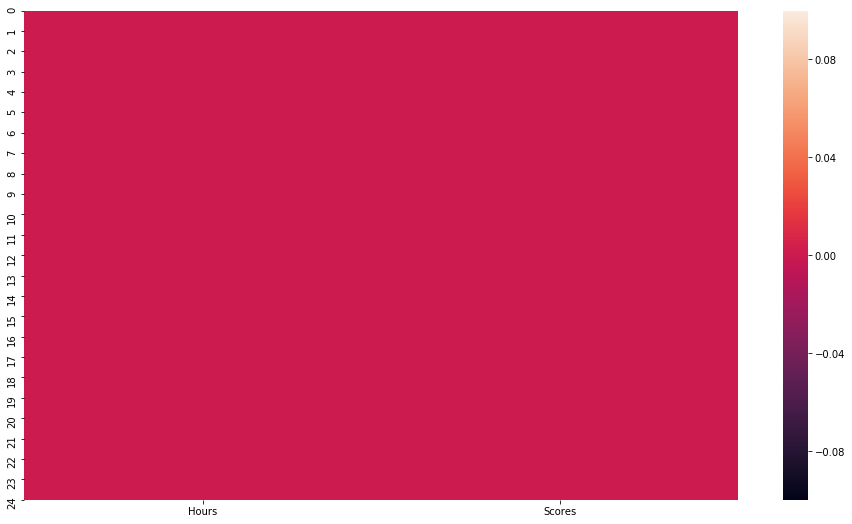

In [18]:
plt.figure(figsize = (16,9))
sns.heatmap(df.isnull())

## Remove Outliers

In [19]:
def outlier_detection(df):
    
    #detecting the null or nan value and removing the firest
    # to ensure the numerical columns can be detection currently
    
    r = []
    for col in df.columns:
        for i in df.index:
            if df.loc[i, col]== "null" or df.loc[i, col]== np.nan:
                r.append(i)
      
    df = df.drop(list(set(r)))
    df = df.reset_index()
    df = df.drop("index", axis=1)
    
    # finding out the columns having numerical value
    num_cols = []
    for col in df.columns:
        if df[col].dtype == "object":
            try:
                df[col]= pd.to_numeric(df[col])
                num_cols.append(col)
            except ValueError:
                pass
                    
    #removing the rows having value which can be colled Outlier
    #on the base of their z-sorce >3 or <-3
    count = 0
    t = []
    for i in num_cols:
        z = np.abs[stats.zscorce(df[i])]
        for j in range[len[z]]:
            if z[j]>3 or z[j]<-3:
                append(t)
                count+=1
                
    df = df.drop(list(set(r)))
    df = df.reset_index()
    df = df.drop("index", axis=1)
    print(count)
    return(df)
                   
                   
                
                
    

In [20]:
df = outlier_detection(df)

0


## Distribution

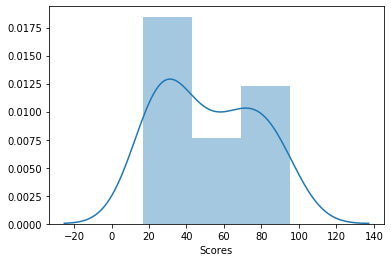

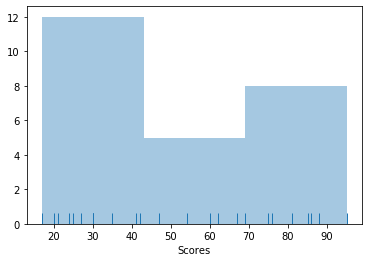

In [21]:
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"], kde=False ,rug=True)
plt.show()

C:\Users\Satish Kumar Pal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


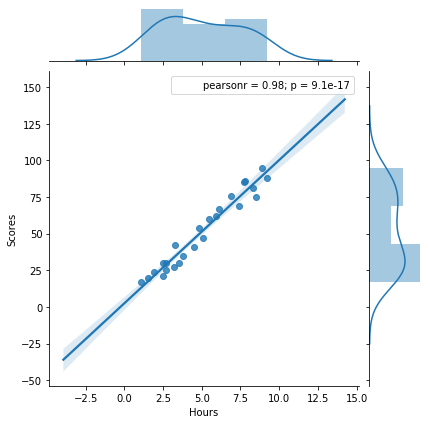

In [22]:
sns.jointplot(df["Hours"], df["Scores"], kind= "reg").annotate(stats.pearsonr)
plt.show()

## Performing Simple Linear Regression

Calculating the coeffeciants of the Simple Linear Regression y = B0+B1.x (B1 slope B0 Intercept)

In [23]:
mean_x = np.mean(df["Hours"])
mean_y = np.mean(df["Scores"])
num =0
den =0
x = list(df["Hours"])
y = list(df["Scores"])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [24]:
B1

9.775803390787475

In [25]:
B0 = mean_y - B1*mean_x
B0

2.4836734053731746

In [26]:
df["prediction_Scores"] = B0 + B1*df["Hours"]

In [27]:
df.head()

,Hours,Scores,prediction_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


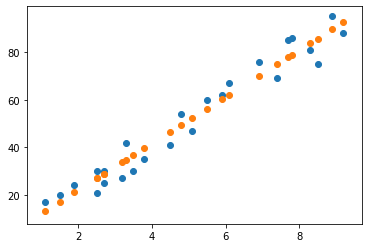

In [39]:
plt.scatter(df["Hours"], df["Scores"])
plt.scatter(df["Hours"],df["prediction_Scores"])
plt.plot()
plt.show()

## Prediction of given value :9.25

In [29]:
B0 + B1*9.25

92.90985477015732

In [30]:
y = list(df["Scores"].values)
y_pred = list(df["prediction_Scores"].values)

In [31]:
s = sum([(y_pred[i]- y[i])**2 for i in range(len(df))])
rmse = (np.sqrt(s/len(df)))/mean_y

In [32]:
rmse

0.10439521325937494

## OLS Model

In [34]:
model = smf.ols("Scores ~ Hours", data=df)
model = model.fit()

In [35]:
df["pred_ols"] = model.predict(df["Hours"])

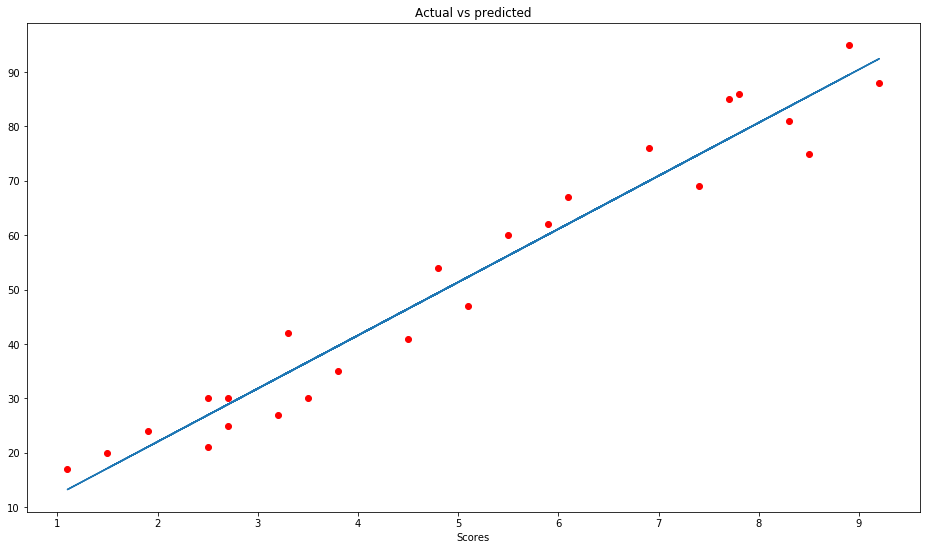

In [38]:
plt.figure(figsize =(16,9))
plt.plot(df["Hours"],df["pred_ols"] )
plt.plot(df["Hours"], df["Scores"], "ro")
plt.title("Actual vs predicted")
plt.xlabel("Hours")
plt.xlabel("Scores")
plt.show()

We can observe that the predicted value for 9.25 hours around 92

## Additional conclusions: Categorical prediction

In [40]:
#Consider a threshold to come to conlusion whether the student or not
#Let's consider here 40 as the cut -off pass
cut_off = 40

In [42]:
df["Result"]= df["Scores"]>=40

In [43]:
df.head()

,Hours,Scores,prediction_Scores,pred_ols,Result
0,2.5,21,26.923182,26.923182,False
1,5.1,47,52.340271,52.340271,True
2,3.2,27,33.766244,33.766244,False
3,8.5,75,85.578002,85.578002,True
4,3.5,30,36.698985,36.698985,False


## Plotting the given data's Result

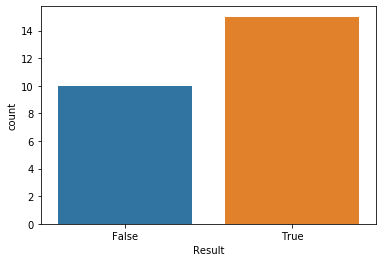

In [44]:
sns.countplot(df["Result"])

## Feature Engineering

In [46]:
feature = df["Hours"].values. reshape(-1,1)
target = df["Result"].values

## Splitting the data

In [47]:
X_train,X_test,y_train,y_test = train_test_split(feature , target, random_state =0)

## Training the model KNN

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Accuracy

In [49]:
knn.score(X_train,y_train)

0.9444444444444444

In [50]:
knn.score(X_test,y_test)

0.8571428571428571

## Prediction the outcomes

In [51]:
get_results = [[9.25]]

In [53]:
knn.predict(get_results)

array([ True])

In [57]:
knn.predict([[14]])

array([ True])

In [58]:
knn.predict([[3]])

array([False])